In [4]:
# Import relevant packages

import uproot # conda install -c conda-forge uproot
import vector # conda install -c conda-forge vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import math
import json
plt.style.use('seaborn-v0_8-colorblind')

In [5]:
plt.rcParams.update({'font.size': 20,
                    'xtick.labelsize' : 40,
                    'ytick.labelsize' : 40,
                    'xtick.major.size' : 10,
                    'ytick.major.size' : 10,
                    'xtick.minor.size' : 5,
                    'ytick.minor.size' : 5,
                    'axes.labelsize' : 50,
                    'axes.titlesize' : 50}) 

In [6]:
BIBDoubles=json.load(open("/Users/isaac/Desktop/10TeVMCDataAnalysis/doubleLayerFiltering/nearestPairBIB.json"))
noBIB0=json.load(open("/Users/isaac/Desktop/10TeVMCDataAnalysis/doubleLayerFiltering/nearestPair0NoBIB.json"))
noBIB250=json.load(open("/Users/isaac/Desktop/10TeVMCDataAnalysis/doubleLayerFiltering/nearestPair250NoBIB.json"))

In [7]:
print(BIBDoubles.keys())

dict_keys(['deltaPesudorapdity', 'deltaPhi', 'deltaR', 'emptyBoxes'])


In [8]:
print(noBIB0.keys())

dict_keys(['deltaPesudorapdity', 'deltaPhi', 'deltaR', 'emptyBoxes'])


In [9]:
print(noBIB0.keys())

dict_keys(['deltaPesudorapdity', 'deltaPhi', 'deltaR', 'emptyBoxes'])


In [10]:
# a handy plotting function
def plot1DHistogram(data,bins,scale='linear',label="", savefig=False, dpi=300):
    
    # handle data, there must be a smarter way to do this...
    if type(data[0])==np.int64 : data_flat=data
    elif type(data[0])==np.float32 : data_flat=data
    elif type(data[0])==np.float64 : data_flat=data
    else: data_flat = ak.flatten(data)
    
    fig = plt.figure(figsize=(30,20))
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.yscale(scale)
    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [11]:
# a handy plotting function
def plot2DHistogram(datax, datay, bins=100, norm="log", label="", savefig=False, dpi=300):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(30,20))
    ax = fig.add_subplot(111)
    
    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [26]:
print(BIBDoubles["deltaR"][0][0])

2.6207950906744104


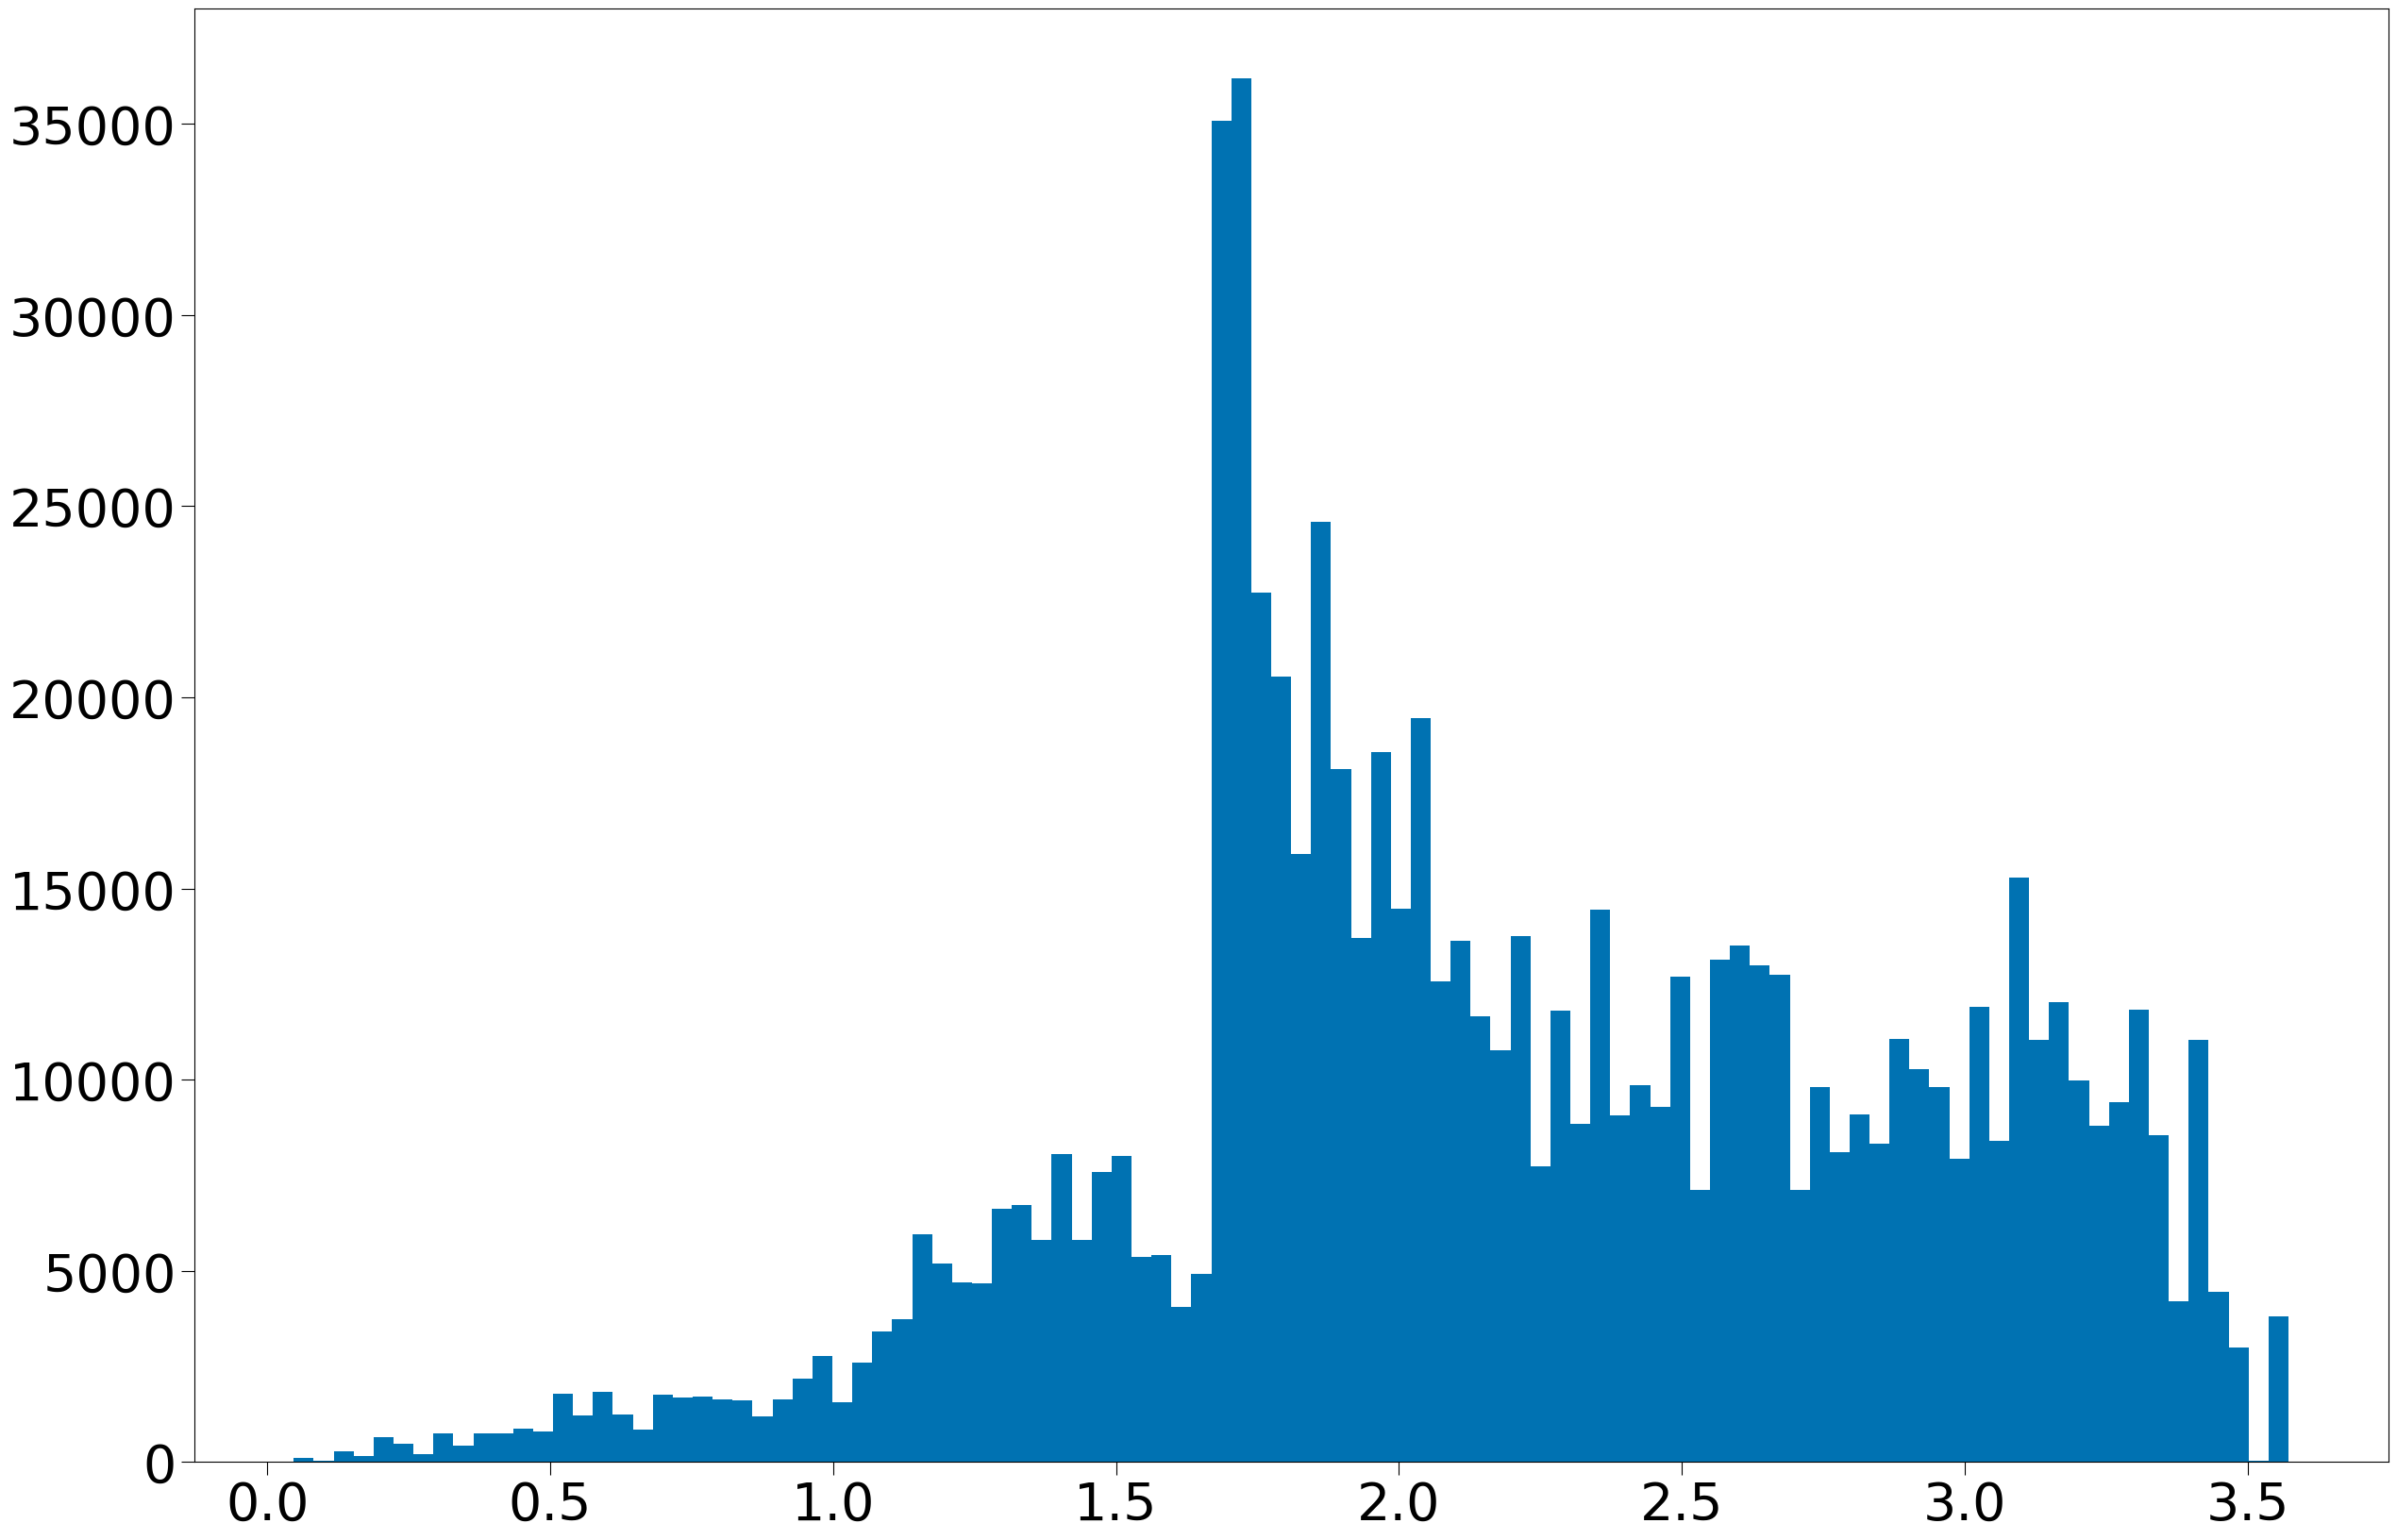

In [23]:
plot1DHistogram(BIBDoubles["deltaR"], bins=100)

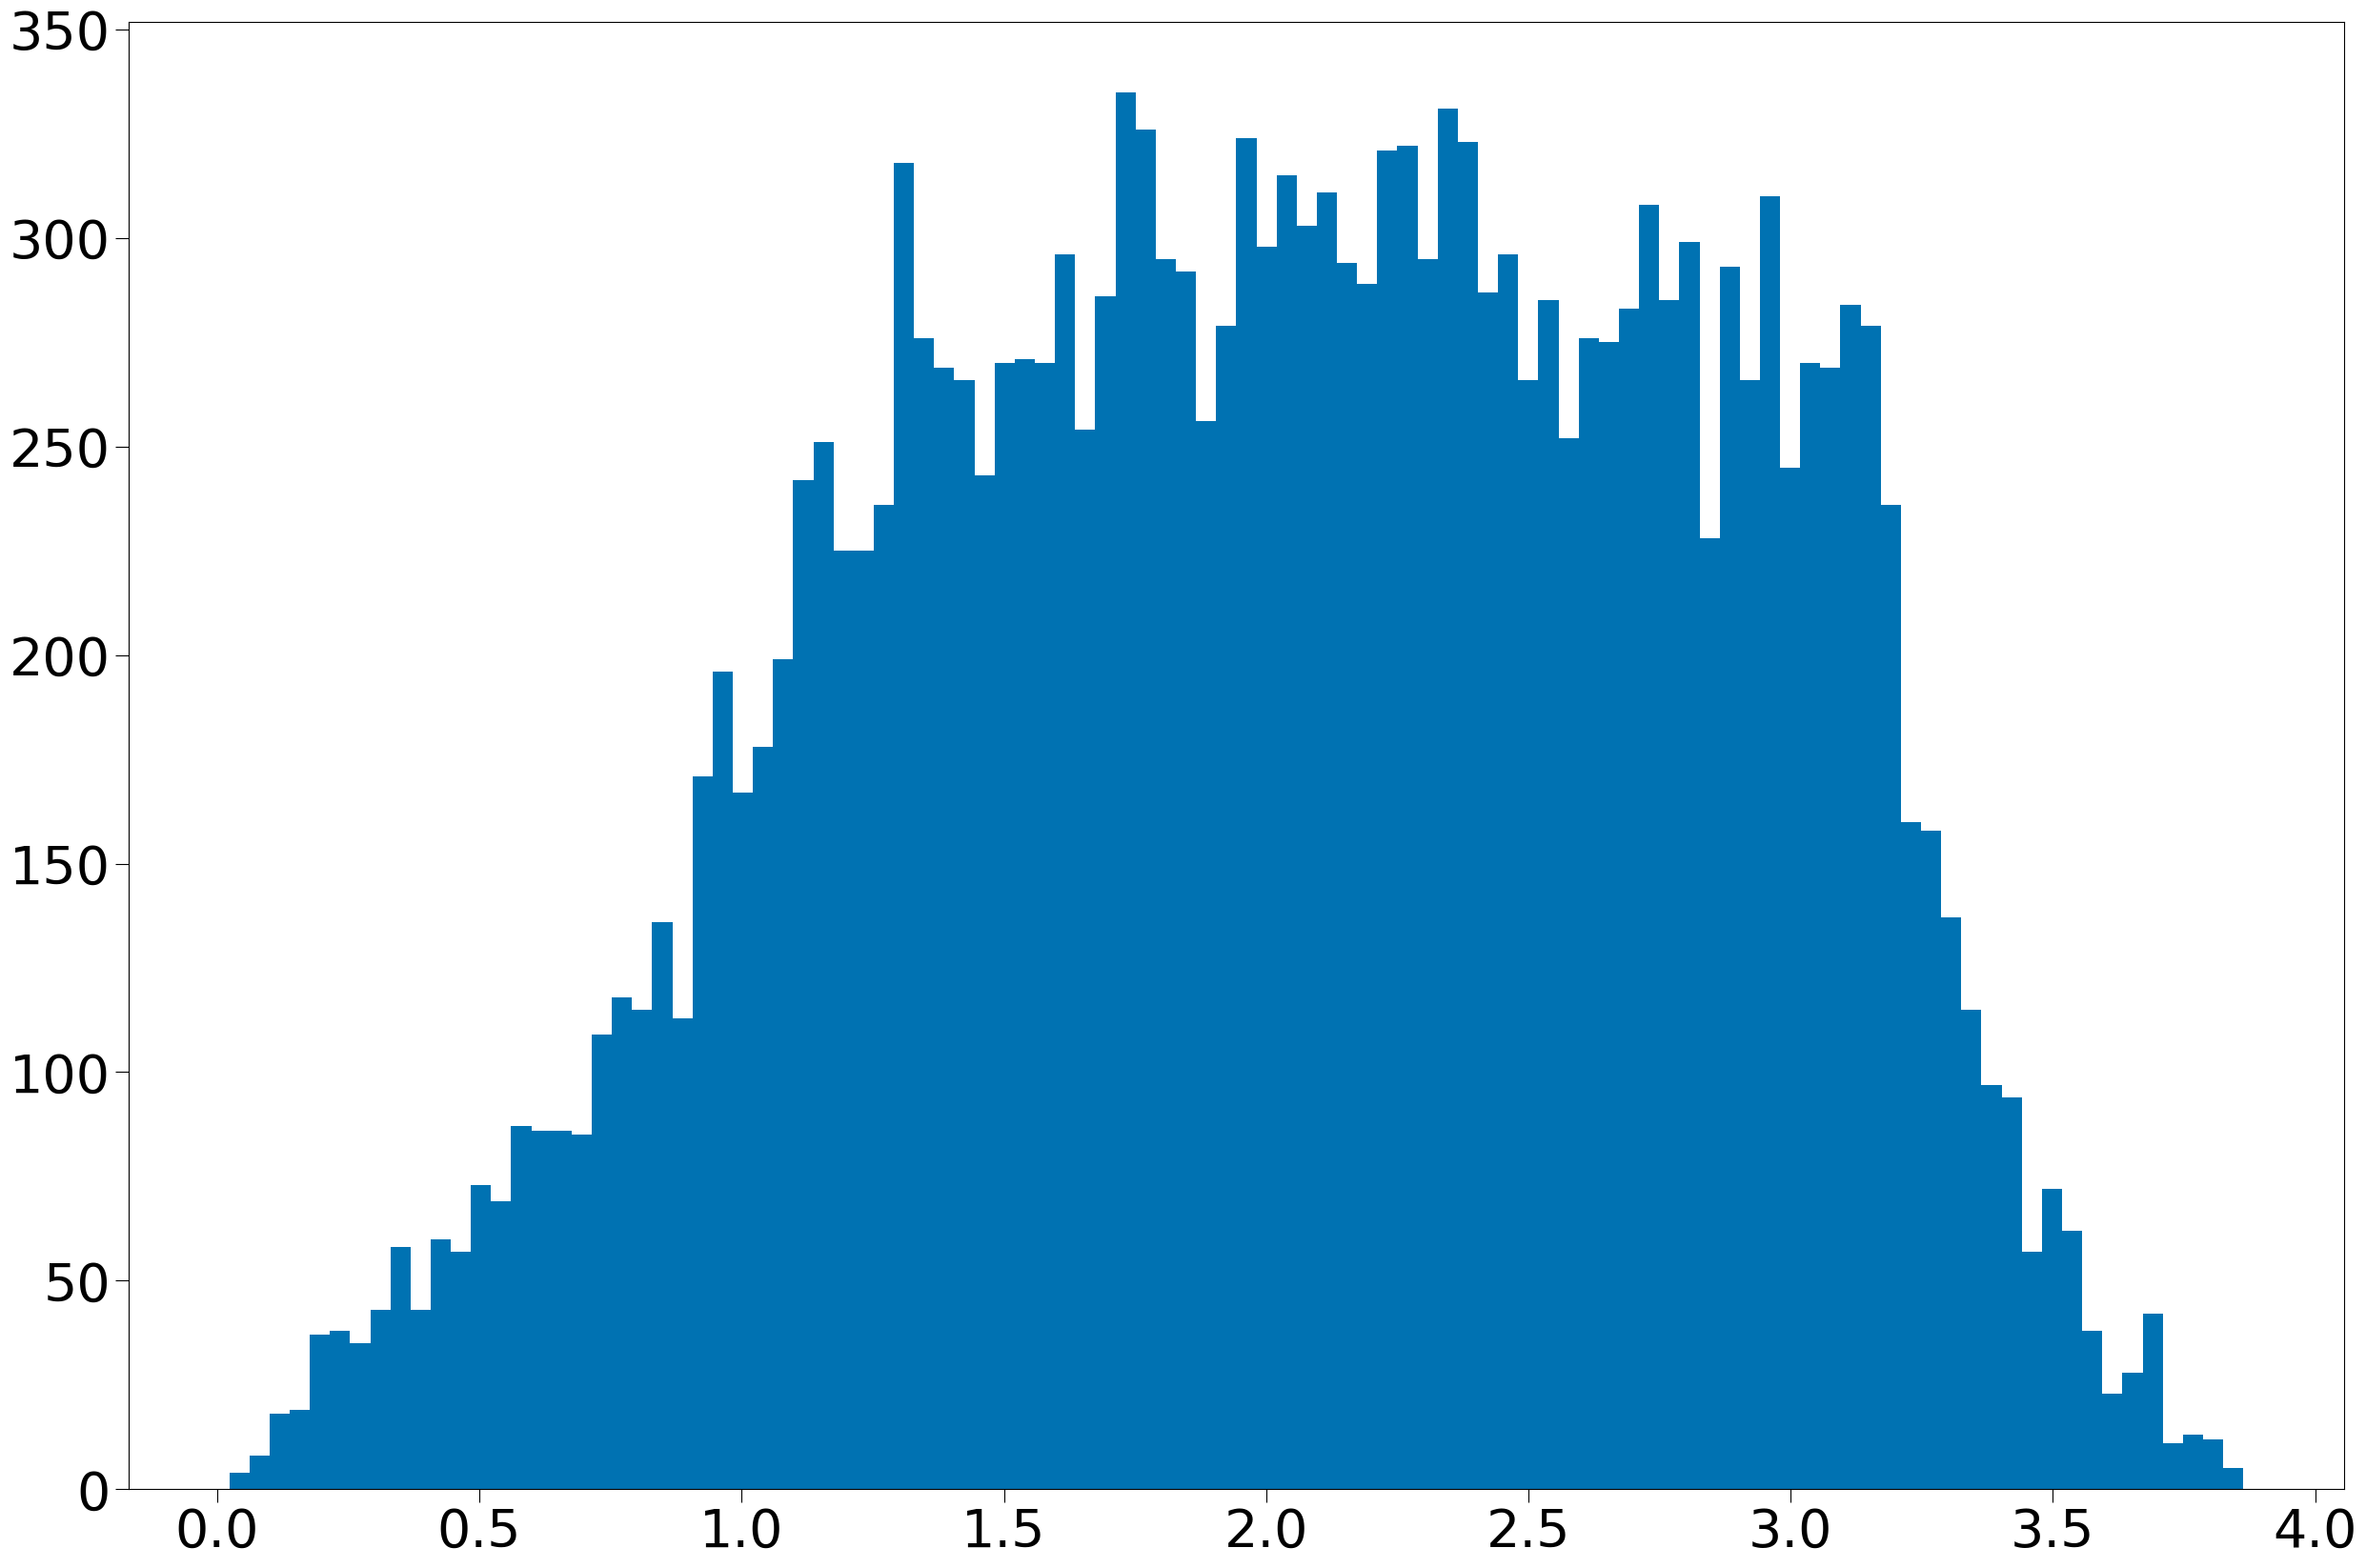

In [15]:
plot1DHistogram(noBIB0["deltaR"], bins=100)

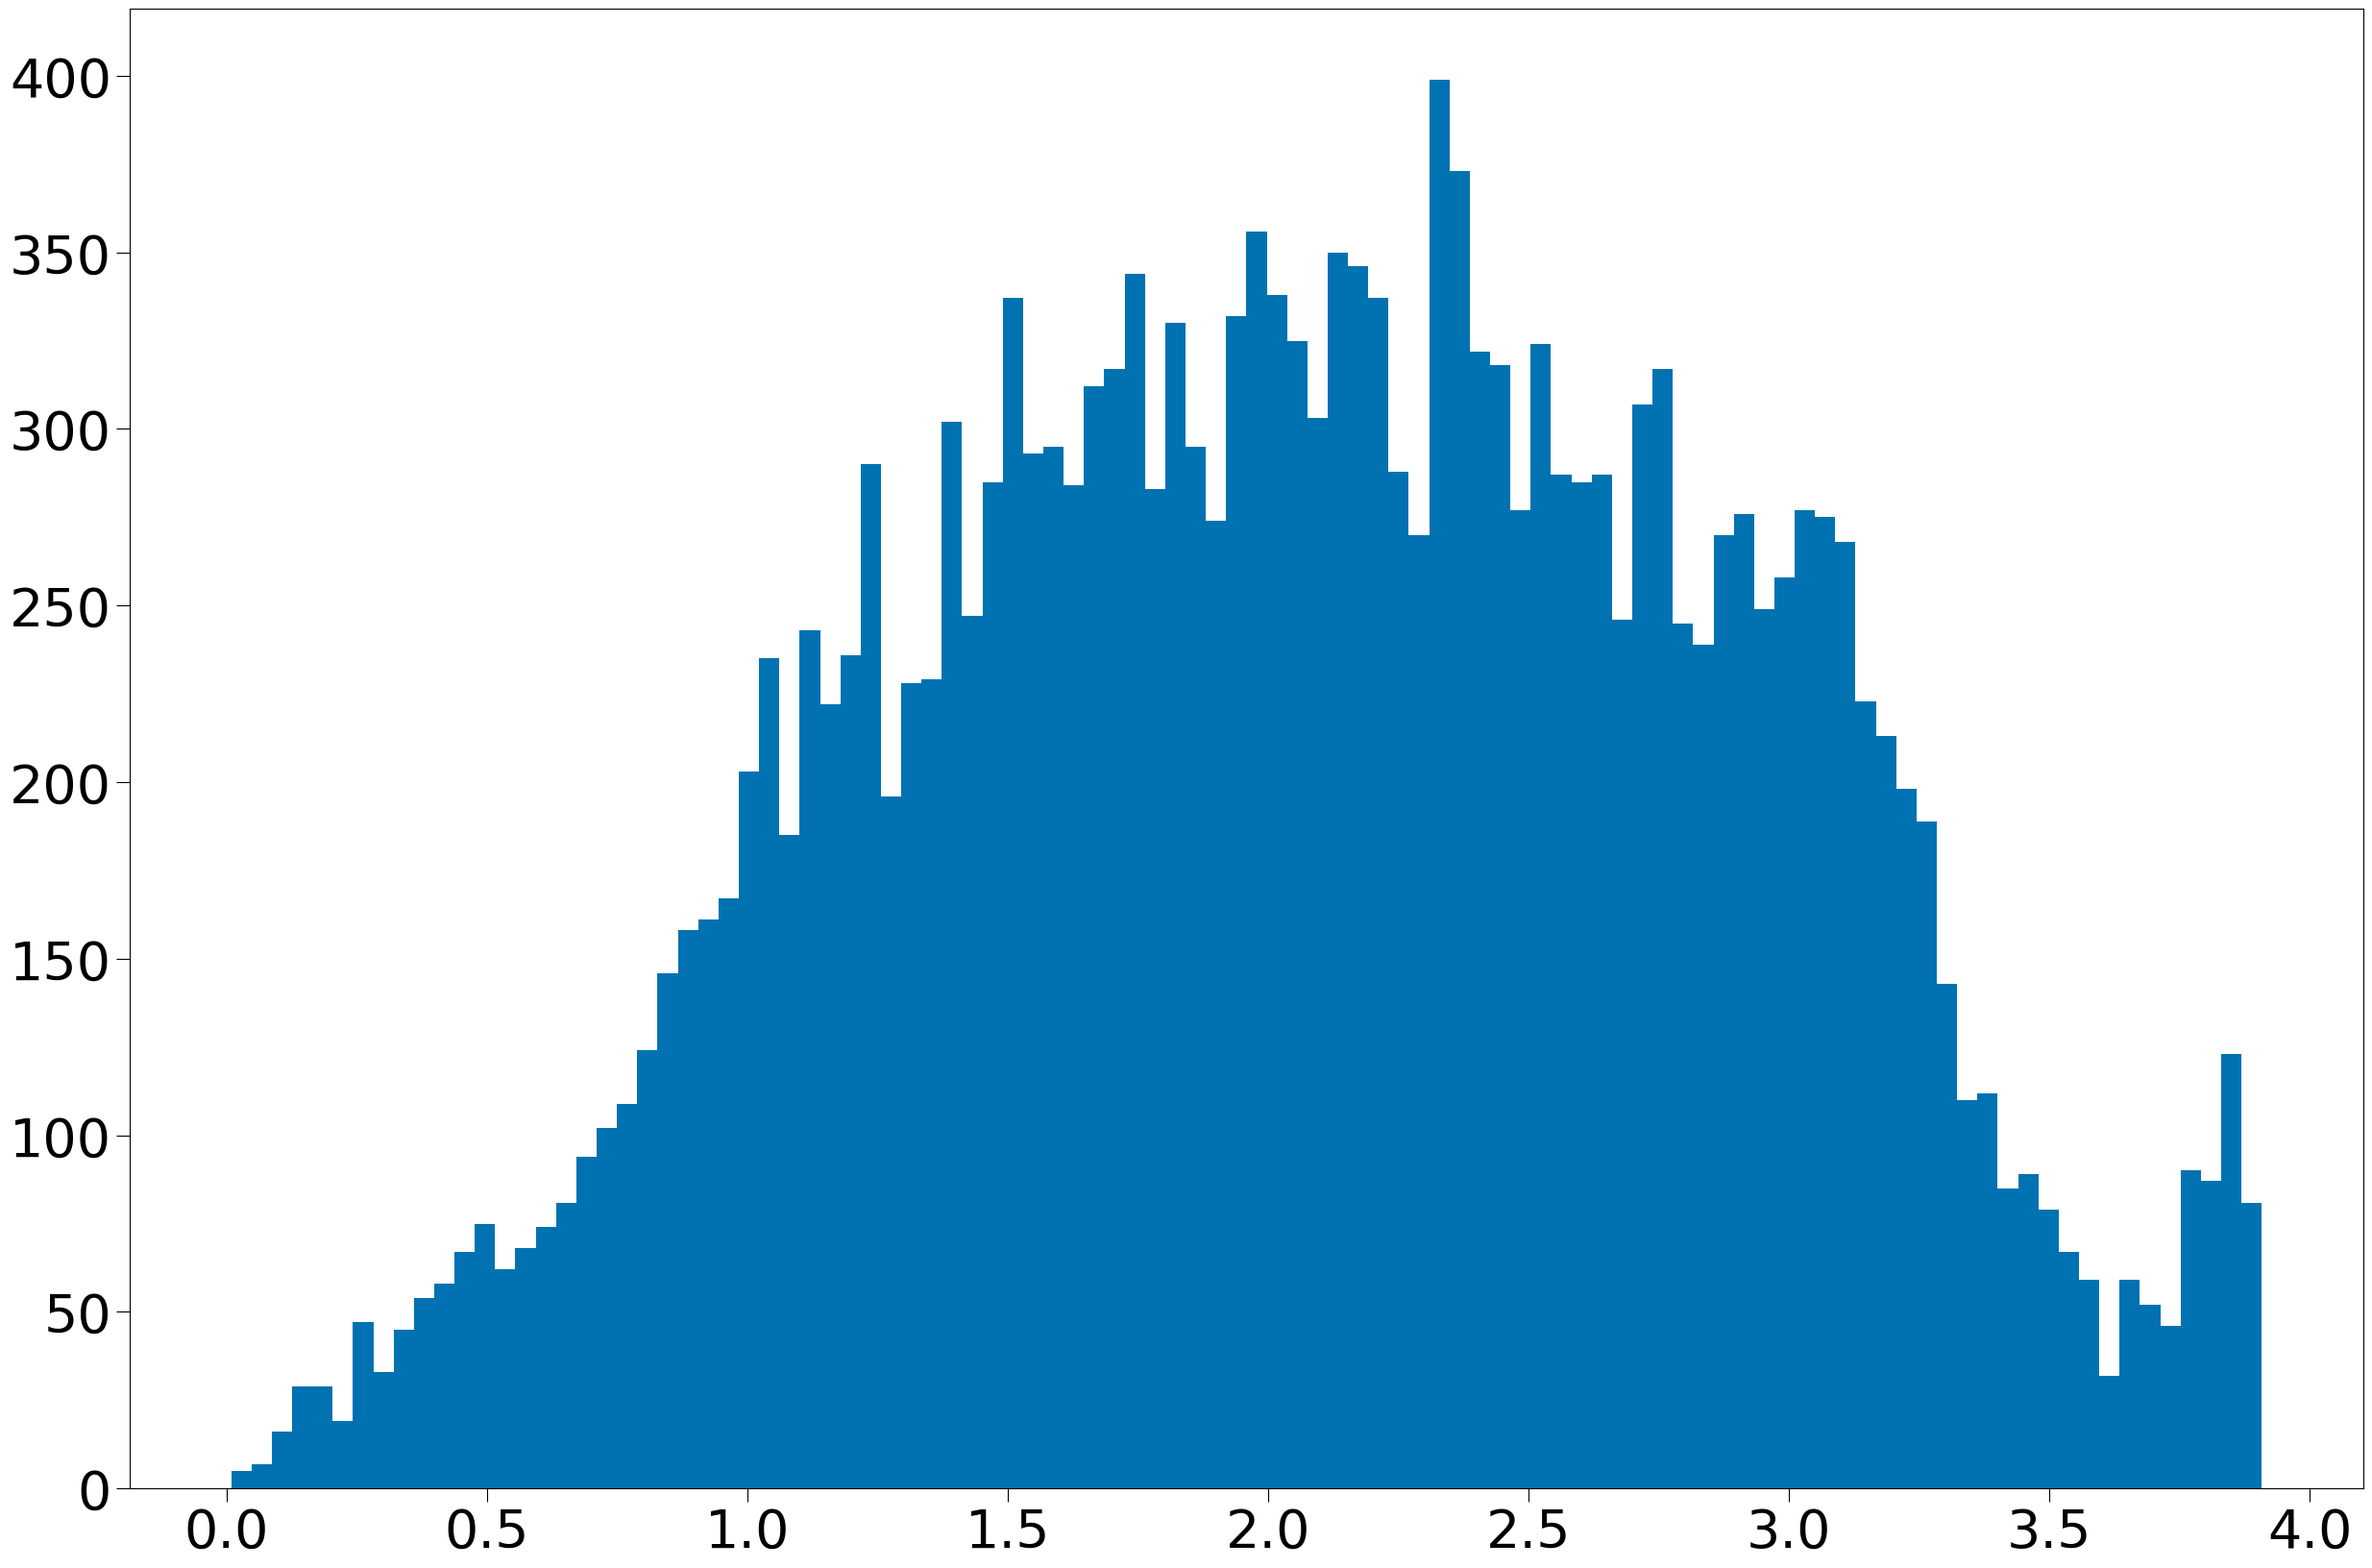

In [16]:
plot1DHistogram(noBIB250["deltaR"], bins=100)

In [18]:
print(BIBDoubles["emptyBoxes"])

[732364, 229729, 314497, 425250, 349456, 125164, 259204, 271425, 207617]


In [27]:
print(len(BIBDoubles["deltaR"][0]))

330976


In [28]:
print(noBIB0["emptyBoxes"])

[532, 152, 143, 86, 37, 139, 141, 82, 37]


In [30]:
print(len(noBIB0["deltaR"][0]))

8242
